<a href="https://colab.research.google.com/github/MoudiAlhazzaa/-Dataset-Selection-and-Neural-Network-Experimentation/blob/main/Task6_T5_obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Load and read the dataset

In [34]:
df = pd.read_csv('/content/obesity_level.csv')

# Explore the dataset

In [35]:
df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,Sometimes,0,2.151809,0,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,Frequently,0,1.000000,0,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,Sometimes,0,2.000000,0,1.158040,1.198439,0,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,Sometimes,0,2.144838,0,0.000000,0.973834,0,Automobile,Overweight_Level_II


In [36]:
df.shape

(20758, 18)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [38]:
df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
0be1dad                           0
dtype: int64

In [39]:
df.drop(columns=["id"],inplace=True)

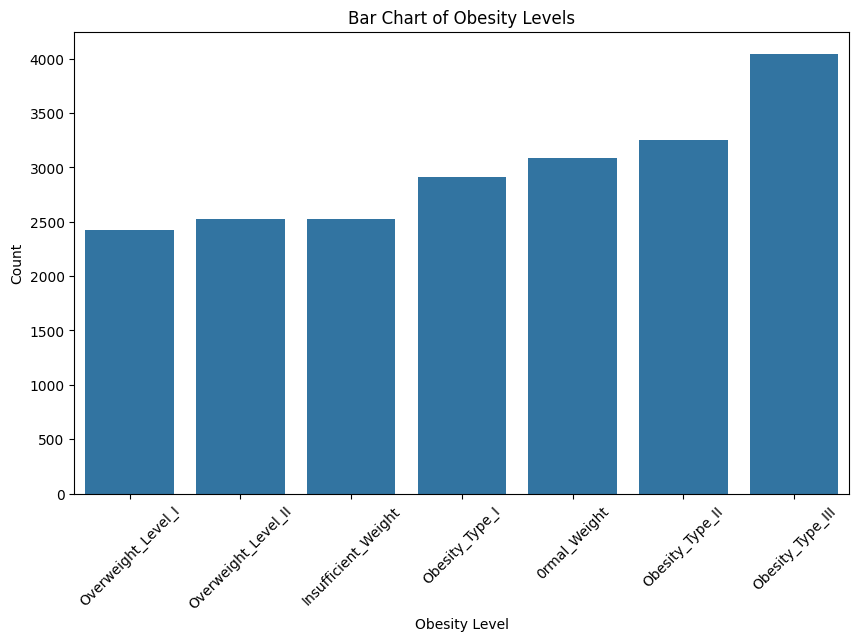

In [46]:
df.rename(columns={"0be1dad": "obesity_level"}, inplace=True)
sorted_data = df['obesity_level'].value_counts().sort_values()

plt.figure(figsize=(10, 6))
sns.countplot(x="obesity_level", data=df, order=sorted_data.index)
plt.xticks(rotation=45)
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.title('Bar Chart of Obesity Levels')


plt.show()

KeyError: 'type_weights_map'

# Split the columns to numerical and categorical

In [42]:
catg_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['number']).columns

print('The Categorical columns: ', catg_cols)
print('__________________________________________________________________________')
print('The Numerical Columns: ', num_cols)

The Categorical columns:  Index(['Gender', 'CAEC', 'CALC', 'MTRANS', 'obesity_level'], dtype='object')
__________________________________________________________________________
The Numerical Columns:  Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE'],
      dtype='object')


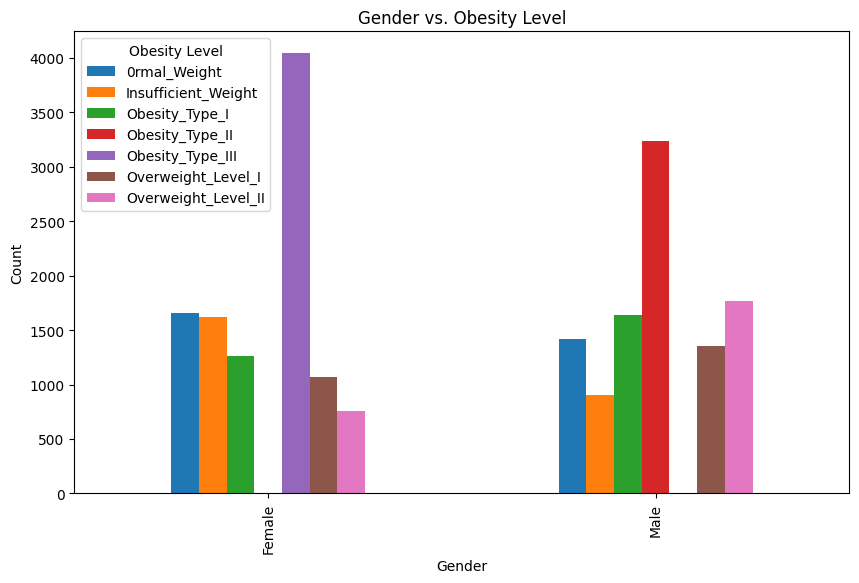

In [52]:
grouped_data = df.groupby(['Gender', 'obesity_level']).size().unstack()

grouped_data.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs. Obesity Level')
plt.legend(title='Obesity Level')

plt.show()

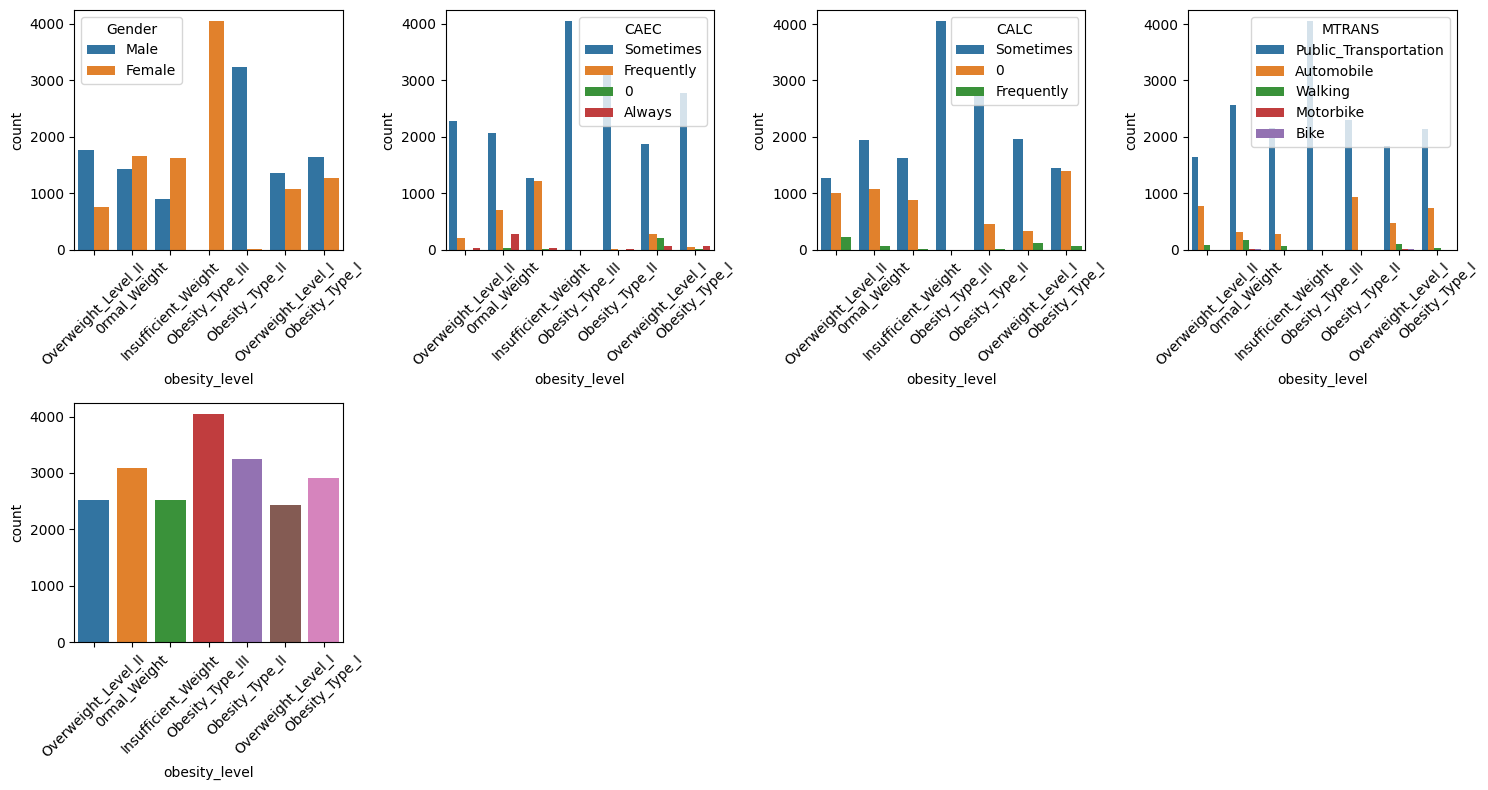

In [43]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(catg_cols, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x="obesity_level", hue=col, data=df)
    plt.xticks(rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

# check null values

In [ ]:
df[catg_cols].isna().sum()

In [ ]:
df[num_cols].isna().sum()

# Numerical Data Preprocessing

# Scalling MinMax

In [ ]:
#scaler = MinMaxScaler()

#df[num_cols] = scaler.fit_transform(df[num_cols])
#df[num_cols]

# Categorical Data Preprocessing

# Mapping

In [ ]:
#type_weights_map = {  # the mapping to replace for ordinal encoding
  # 1: 'Insufficient_Weight',
   #2: '0rmal_Weight',
  # 3: 'Overweight_Level_I',
   #4: 'Overweight_Level_II',
  # 5: 'Obesity_Type_I',
  # 6: 'Obesity_Type_II',
  # 7: 'Obesity_Type_III'
#}

#df['0be1dad'] = df['0be1dad'].map(type_weights_map) # apply the mapping

In [ ]:
#label_encoder = LabelEncoder()
#df['0be1dad'] = label_encoder.fit_transform(df['0be1dad'])